In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Ankita dhiman\Downloads\train_tweets.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

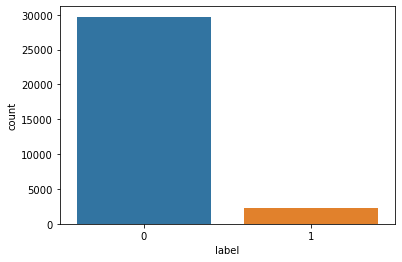

In [4]:
sns.countplot(x= 'label',data = df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
def drop_features(features,data):
     data.drop(features,inplace=True,axis=1)

In [7]:
import re
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])"," ",tweet.lower()).split())

In [8]:
df['processed_tweet']=df['tweet'].apply(process_tweet)

In [9]:
df

,id,label,tweet,processed_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso conde...


In [10]:
##we only need label and processed tweets
drop_features(['id','tweet'],df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   label            31962 non-null  int64 
 1   processed_tweet  31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [12]:
df

,label,processed_tweet
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for lyft credit i can t use cause they ...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ur
4,0,factsguide society now motivation
...,...,...
31957,0,ate isz that youuu
31958,0,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...
31960,1,sikh temple vandalised in in calgary wso conde...


In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect=CountVectorizer(stop_words='english')
transformer=TfidfTransformer()

In [14]:
X=df.iloc[:,1]
X

0        when a father is dysfunctional and is so selfi...
1        thanks for lyft credit i can t use cause they ...
2                                      bihday your majesty
3            model i love u take with u all the time in ur
4                        factsguide society now motivation
                               ...                        
31957                                   ate isz that youuu
31958    to see nina turner on the airwaves trying to w...
31959    listening to sad songs on a monday morning otw...
31960    sikh temple vandalised in in calgary wso conde...
31961                             thank you for you follow
Name: processed_tweet, Length: 31962, dtype: object

In [15]:
y=df.iloc[:,0]
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [16]:
X_count=count_vect.fit_transform(X)
X_tfidf=transformer.fit_transform(X_count)

In [17]:
print(X_count.shape)
print(X_tfidf.shape)

(31962, 38763)
(31962, 38763)


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X_tfidf,y,test_size=0.2,random_state=1)

# logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
model_linear=LogisticRegression()
model_linear.fit(X_train,y_train)

LogisticRegression()

In [22]:
pred_linear=model_linear.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,f1_score
c_m=confusion_matrix(y_test,pred_linear)
print(c_m)

[[5954    6]
 [ 323  110]]


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_linear)

0.9485374628499922

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
model_decision=DecisionTreeClassifier()
model_decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
pred_decision=model_decision.predict(X_test)

In [27]:
c_m2=confusion_matrix(y_test,pred_decision)
print(c_m2)

[[5830  130]
 [ 180  253]]


In [28]:
accuracy_score(y_test,pred_decision)

0.9515094634756766

# SVM

In [29]:
from sklearn.svm import SVC
model_svm=SVC()

In [30]:
model_svm.fit(X_train,y_train)

SVC()

In [31]:
pred_svm=model_svm.predict(X_test)

In [32]:
accuracy_score(y_test,pred_svm)

0.9580791490692946

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
model_random=RandomForestClassifier()
model_random.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
pred_random=model_random.predict(X_test)

In [38]:
accuracy_score(y_test,pred_random)

0.9629282027217269

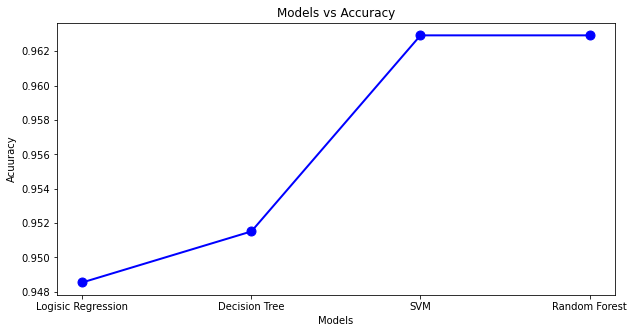

In [40]:
total_accuracy=[accuracy_score(y_test,pred_linear),accuracy_score(y_test,pred_decision),accuracy_score(y_test,pred_svm),accuracy_score(y_test,pred_random)]
models=["Logisic Regression","Decision Tree","SVM","Random Forest"]
plt.figure(figsize=(10,5))
plt.plot(models,total_accuracy,'bo',linestyle='solid',linewidth=2,markersize=9)
plt.xlabel("Models")
plt.ylabel("Acuuracy")
plt.title("Models vs Accuracy")
plt.show()